In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ufit.lab import *
from ufit.plotting import mapping
from ufit import gui
from scipy.optimize import curve_fit
import scipy.integrate as integrate
set_datatemplate('070%03d')

In [2]:
def Gaussfunction(T, x0, A, fwhm):
    return A*np.exp(-(T - x0)**2/(2*(fwhm/2.355)**2))

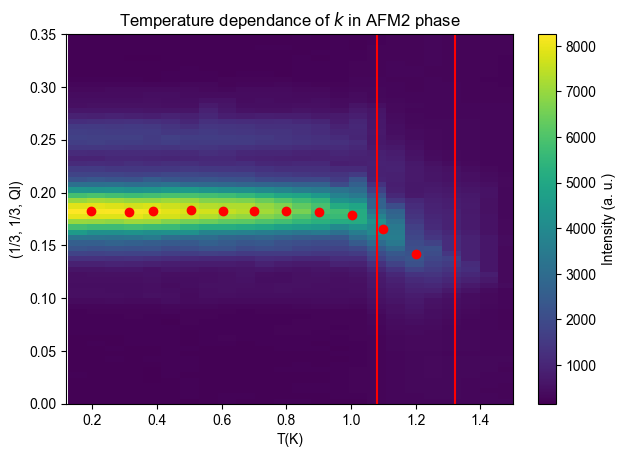

In [10]:
temp_data = []
pos_array = []
intensity_array = []
for i in range(265, 278):
    if i <= 276:
        model = Background() + Gauss('peak1', pos=0.11076, ampl=315.28, fwhm=0.035162) + Gauss('peak2', pos=0.14174, ampl=1104.6,
                                                                                               fwhm=0.018088) + Gauss('peak3', pos=0.18192, ampl=8135.3, fwhm=0.041287) + Gauss('peak4', pos=0.25124, ampl=1400.4, fwhm=0.044787)
    else:
        model = Background() + Gauss('peak1', pos=0.14903, ampl=349.51, fwhm=0.1509) + Gauss('peak2', pos=0.10496, ampl=263.19,
                                                                                             fwhm=0.014733) + Gauss('peak3', pos=0.1418, ampl=2008.3, fwhm=0.035407) + Gauss('peak4', pos=0.21754, ampl=208, fwhm=0.025127)
    data = read_data(i, "QL", "CNTS")
    data.name = f'T = {round(data["TT"]*1000)}mK'
    temp_data = np.append(temp_data, [data["TT"]], axis=0)
    model.fit(data)
    #model.plot(data)
    pos, pos_err, A, A_err, fwhm, fwhm_err = model.params[7].value, model.params[7].error, model.params[
        8].value, model.params[8].error, model.params[9].value, model.params[9].error
    pos_array = np.append(pos_array, [pos], axis=0)
    int_intensity = integrate.quad(
        lambda x: Gaussfunction(x, pos, A, fwhm), -inf, inf)[0]
    intensity_array = np.append(intensity_array, [int_intensity], axis=0)
    data.plot()


#plt.title("Temperature dependace of position of bragg peak")

plt.xlabel("T(K)")
plt.ylabel("(1/3, 1/3, Ql)")


data = read_numors('265-279', 0)
mapping('TT', 'QL', data, dots=False, label="Intensity (a. u.)")
plt.title(r"Temperature dependance of $k$ in AFM2 phase")
plt.xlabel("T(K)")
plt.ylabel("(1/3, 1/3, Ql)")
plt.plot(temp_data, pos_array, 'ro')
plt.plot([1.08, 1.08], [-0.1, 1], 'r-')
plt.plot([1.32, 1.32], [-0.1, 1], "r-")
plt.xlim((0.12,1.5))
plt.ylim((0, 0.35))
plt.savefig("temperature_dependance_propagation_new.png")
plt.show()